Fruadulent Model 2024

In [ ]:
#importing necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
#Load the data
df = pd.read_csv('/content/Fraud_Analysis_Dataset.csv')
df.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


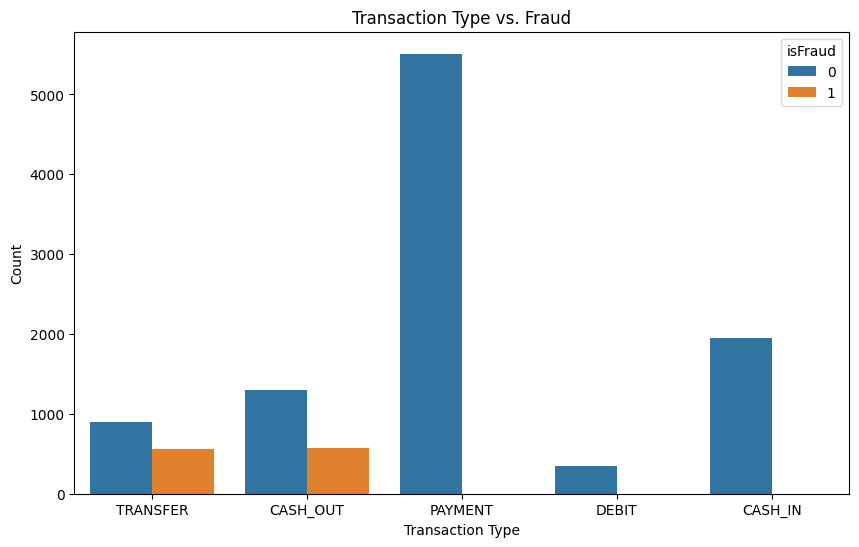

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type vs. Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


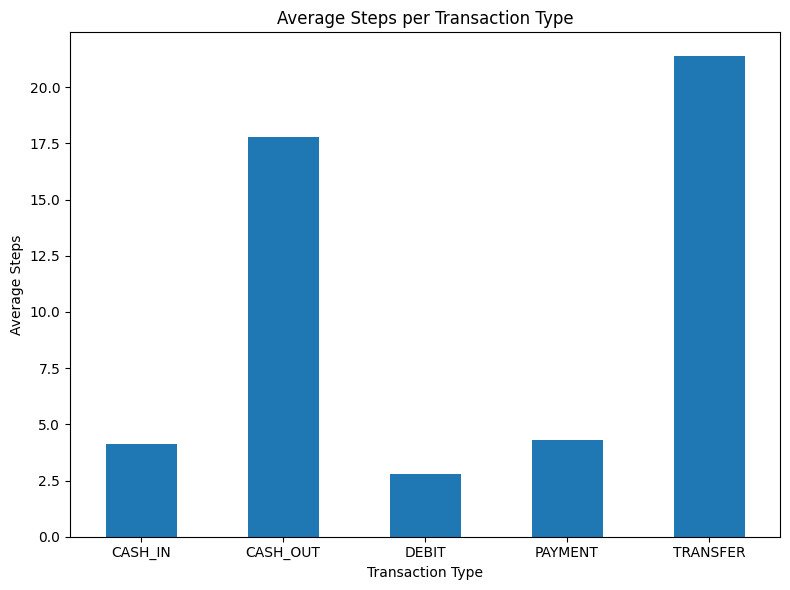

In [ ]:
average_steps = df.groupby('type')['step'].mean()
plt.figure(figsize=(8, 6))
average_steps.plot(kind='bar')
plt.xlabel('Transaction Type')
plt.ylabel('Average Steps')
plt.title('Average Steps per Transaction Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


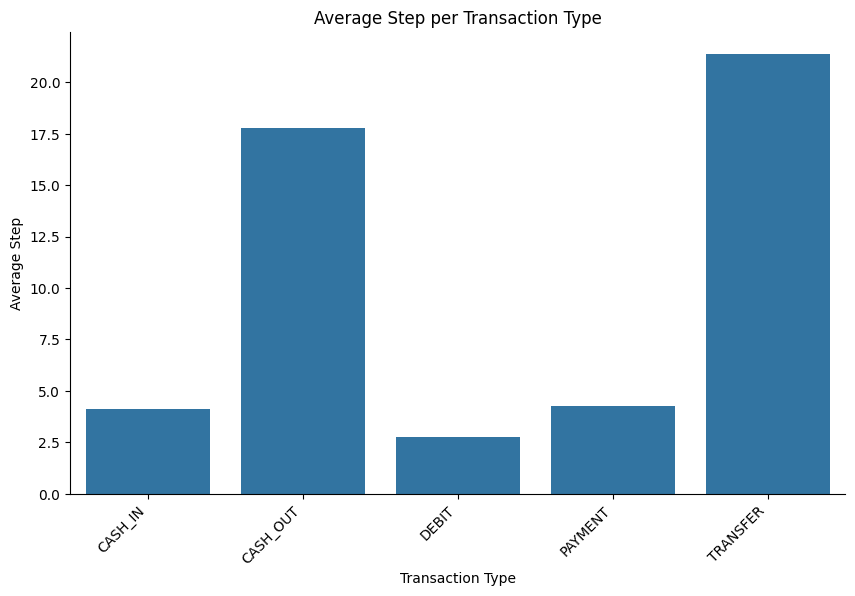

In [ ]:
type_step_data = df.groupby('type')['step'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='step', data=type_step_data)
plt.title('Average Step per Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Step')
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

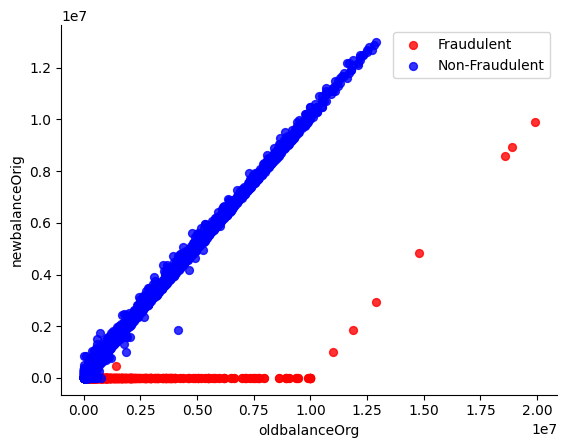

In [ ]:
#oldbalanceOrg vs newbalanceOrig
fraudulent = df[df['isFraud'] == 1]
non_fraudulent = df[df['isFraud'] == 0]
plt.scatter(fraudulent['oldbalanceOrg'], fraudulent['newbalanceOrig'], color='red', label='Fraudulent', s=32, alpha=0.8)
plt.scatter(non_fraudulent['oldbalanceOrg'], non_fraudulent['newbalanceOrig'], color='blue', label='Non-Fraudulent', s=32, alpha=0.8)
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.legend()
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0


In [ ]:
#shape of the binary data(fraud).
isfraud = df['isFraud'].value_counts().rename_axis('isFraud').reset_index(name='counts')
isfraud


,isFraud,counts
0,0,10000
1,1,1142


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [ ]:
# Feature Selection and Encoding
encoder = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity
encoded_type = encoder.fit_transform(df[['type']]).toarray()
encoded_type_df = pd.DataFrame(encoded_type, columns=encoder.get_feature_names_out(['type']))

# Concatenate the encoded 'type' with the rest of the dataframe
df_encoded = pd.concat([df.drop(columns=['type']), encoded_type_df], axis=1)

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [ ]:
# Define feature matrix X and target vector y
X = df_encoded.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y = df_encoded['isFraud']


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the model
model = XGBClassifier(eval_metric='logloss',)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Now perform cross-validation again on the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Cross-validation score on the whole training set
cv_scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy (mean): {cv_scores.mean():.4f}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.9984
Cross-Validation Accuracy (mean): 0.9984


In [ ]:
# Train the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Test Set Accuracy: {accuracy:.4f}")
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Test Set Accuracy: 0.9982
Confusion Matrix:
[[2001    0]
 [   4  224]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.98      0.99       228

    accuracy                           1.00      2229
   macro avg       1.00      0.99      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [ ]:
# Example transaction to predict (replace with real data as needed)
sample_transaction = {
    'step': [1],
    'amount': [181],
    'oldbalanceOrg': [0],
    'newbalanceOrig': [0],
    'oldbalanceDest': [0],
    'newbalanceDest': [0],
    'type_CASH_OUT': [0],
    'type_DEBIT': [0],
    'type_PAYMENT': [0],
    'type_TRANSFER': [1]
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_transaction)

# Scale the numerical features (use the same scaler as during training)
sample_df[numerical_cols] = scaler.transform(sample_df[numerical_cols])

# Predict whether this transaction is fraudulent
sample_prediction = model.predict(sample_df)
print('Predicted class (1 for fraud, 0 for non-fraud):', sample_prediction[0])


Predicted class (1 for fraud, 0 for non-fraud): 1


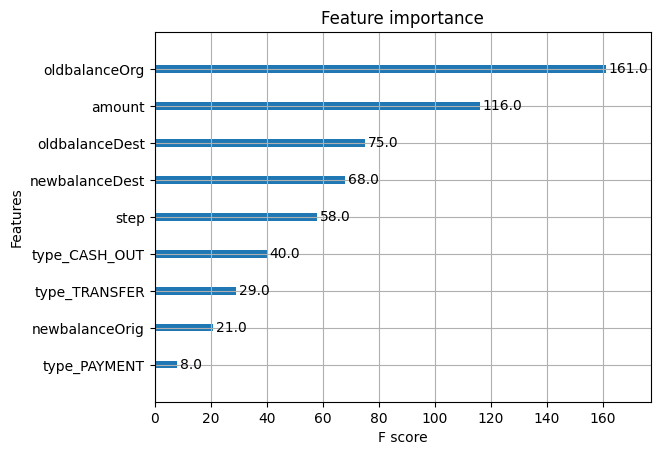

          Feature  Importance
0            step    0.917252
4  oldbalanceDest    0.020399
5  newbalanceDest    0.016334
3  newbalanceOrig    0.012892
6   type_CASH_OUT    0.007398
8    type_PAYMENT    0.007294
9   type_TRANSFER    0.006901
2   oldbalanceOrg    0.006101
1          amount    0.005430
7      type_DEBIT    0.000000


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(model)
plt.show()

# Alternatively, get the feature importances as a list
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)
